In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import glob as gb
import os

In [2]:
train_data='../input/face-expression-recognition-dataset/images/train'
test_data='../input/face-expression-recognition-dataset/images/validation'


In [3]:
code={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}
def code_func(n):
  for i , j in code.items() :
    if i==n :
      return j


In [4]:
Size=100
X_train=[]
y_train=[]
X_test=[]
y_test=[]

In [5]:
for folder in os.listdir(path=train_data):
  files =gb.glob(pathname=str(train_data +"//"+folder+"/*.jpg"))
  for file in files :
    image=cv.imread(file)
    X_train.append(list(cv.resize(image,(Size,Size))))
    y_train.append(code_func(folder))

In [6]:
X_train=np.array(X_train)
y_train=np.array(y_train)


In [7]:
for folder in os.listdir(path=test_data):
  files =gb.glob(pathname=str(test_data +"//"+folder+"/*.jpg"))
  for file in files :
    image=cv.imread(file)
    X_test.append(list(cv.resize(image,(Size,Size))))
    y_test.append(code_func(folder))

In [8]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [9]:
X_train.shape

(28821, 100, 100, 3)

In [10]:
X_test.shape

(7066, 100, 100, 3)

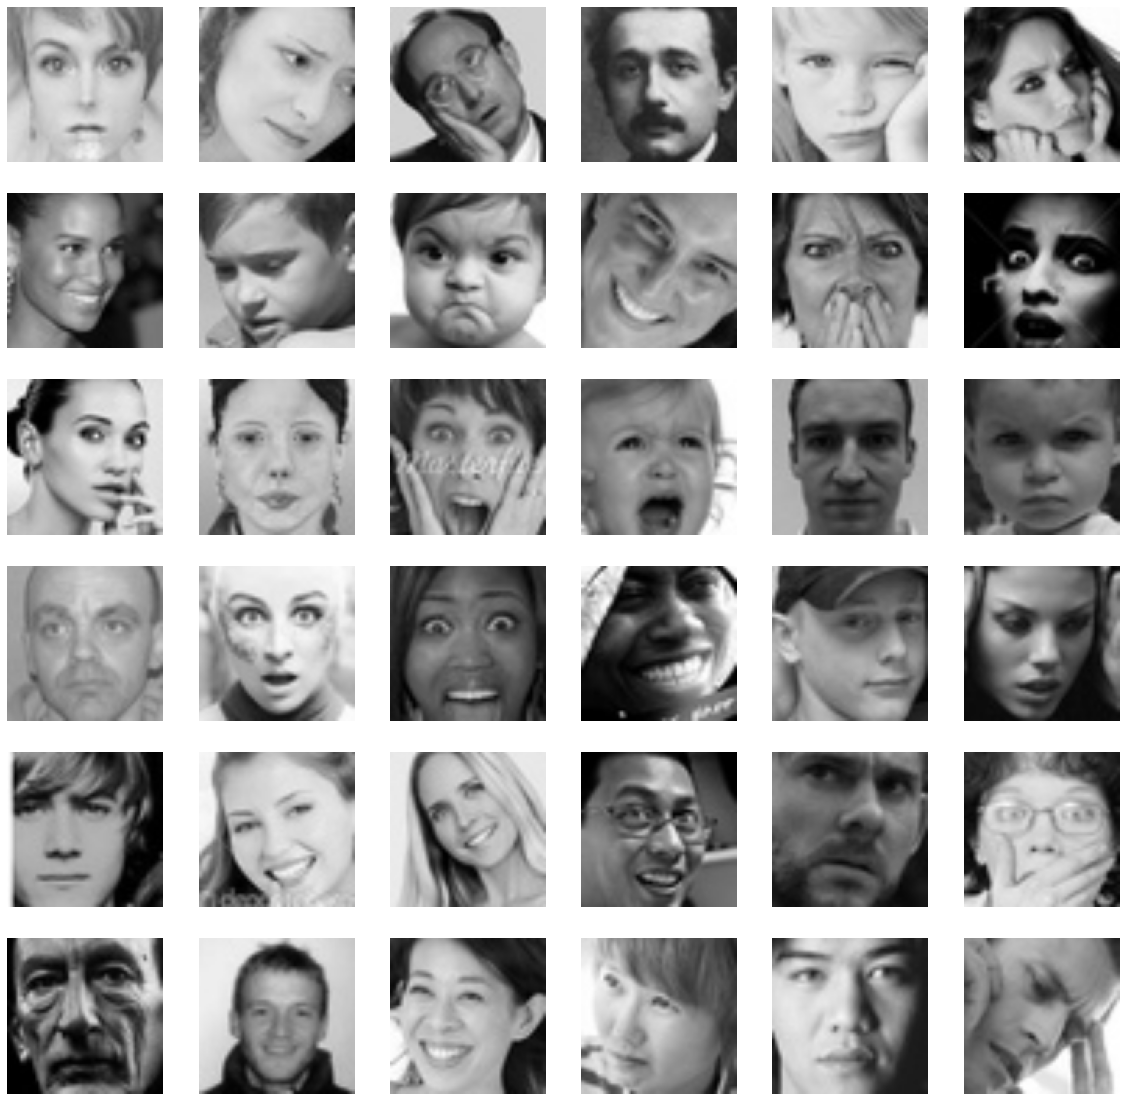

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(code_func(y_train[i]))

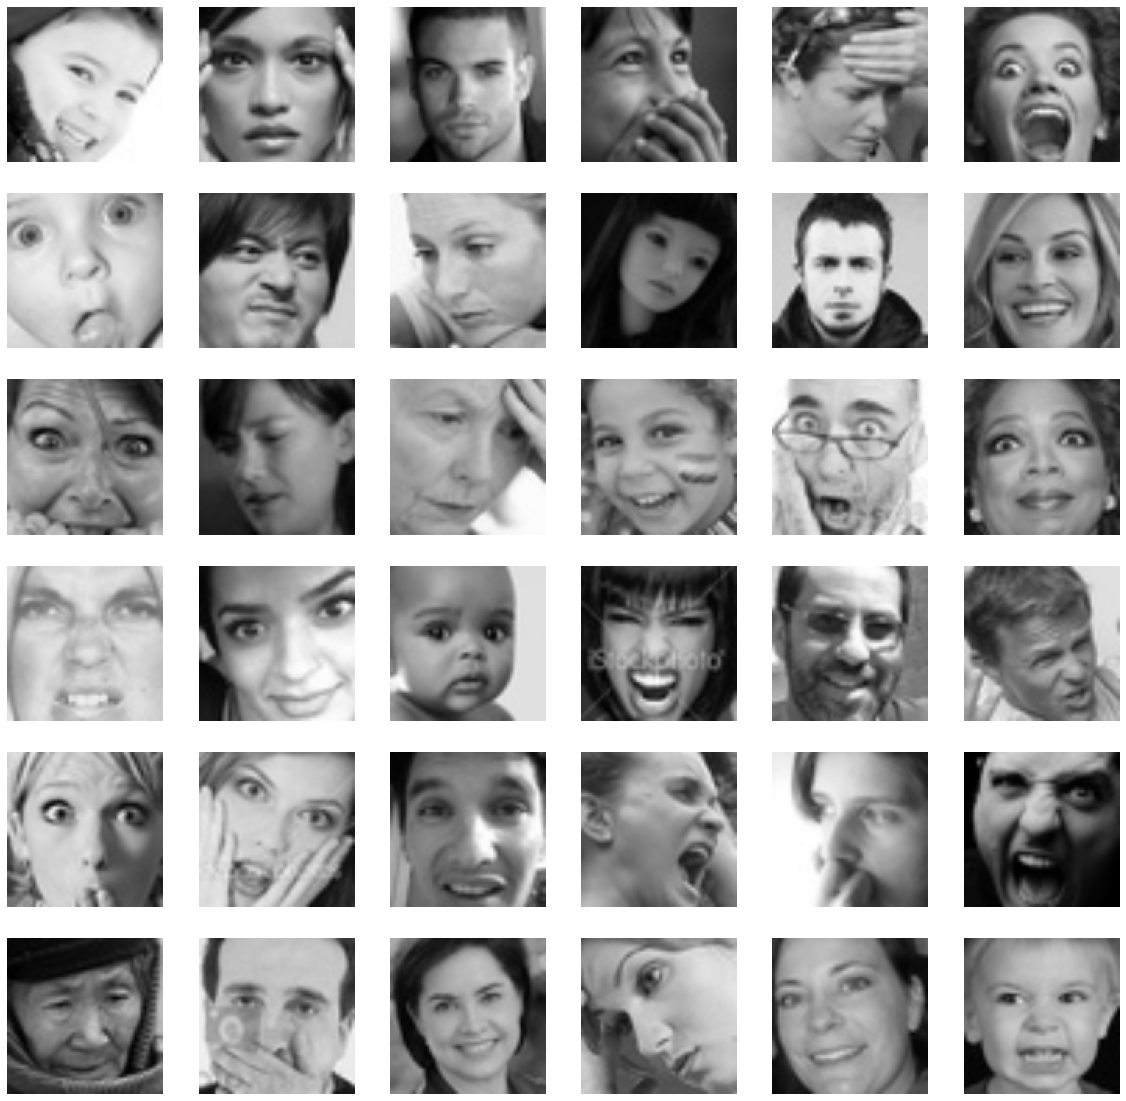

In [12]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(code_func(y_test[i]))

In [13]:
import keras
from keras.layers import Dense , Flatten , Dropout , BatchNormalization , Conv2D , MaxPooling2D 
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [16]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                input_shape=(Size,Size,3),
                kernel_initializer='he_normal'))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax',kernel_initializer='glorot_normal'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)             

In [18]:
image_gen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True)

image_gen.fit(X_train, augment=True)

In [19]:
from sklearn.utils import shuffle
X_train ,  y_train = shuffle(X_train, y_train, random_state=0)

In [20]:
callbacks=EarlyStopping(patience=10,restore_best_weights=True)

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[callbacks],verbose=2,batch_size=32)

Epoch 1/100
901/901 - 5s - loss: 1.0328 - accuracy: 0.6232 - val_loss: 1.3177 - val_accuracy: 0.5324
Epoch 2/100
901/901 - 5s - loss: 0.9979 - accuracy: 0.6361 - val_loss: 1.3051 - val_accuracy: 0.5354
Epoch 3/100
901/901 - 5s - loss: 0.9674 - accuracy: 0.6528 - val_loss: 1.3042 - val_accuracy: 0.5327
Epoch 4/100
901/901 - 5s - loss: 0.9324 - accuracy: 0.6661 - val_loss: 1.3125 - val_accuracy: 0.5355
Epoch 5/100
901/901 - 5s - loss: 0.8968 - accuracy: 0.6872 - val_loss: 1.3410 - val_accuracy: 0.5443
Epoch 6/100
901/901 - 5s - loss: 0.8500 - accuracy: 0.7014 - val_loss: 1.3931 - val_accuracy: 0.5337
Epoch 7/100
901/901 - 5s - loss: 0.8174 - accuracy: 0.7126 - val_loss: 1.3635 - val_accuracy: 0.5385
Epoch 8/100
901/901 - 5s - loss: 0.7905 - accuracy: 0.7271 - val_loss: 1.4409 - val_accuracy: 0.5314
Epoch 9/100
901/901 - 5s - loss: 0.7510 - accuracy: 0.7412 - val_loss: 1.4294 - val_accuracy: 0.5416
Epoch 10/100
901/901 - 5s - loss: 0.7144 - accuracy: 0.7554 - val_loss: 1.4141 - val_accura

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))